In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [ ]:
path = '/content/gdrive/MyDrive/archive (2)/animals/'
categories = ['dogs', 'panda', 'cats']

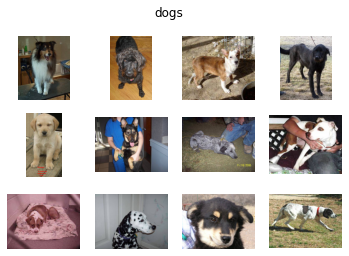

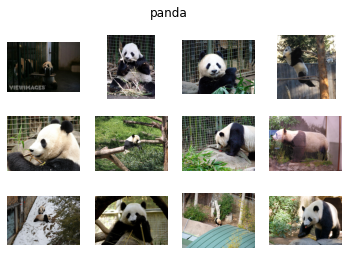

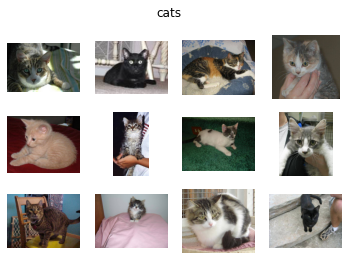

In [ ]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()


In [ ]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

dogs  => height min :  50 width min :  59
dogs  => height max :  500 width max :  500
panda  => height min :  87 width min :  78
panda  => height max :  1200 width max :  1600


In [ ]:
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

for imagePath in imagePaths:
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT)) 
    data.append(image)
    
    label = imagePath[1]
    labels.append(label)

[['/content/gdrive/MyDrive/archive (2)/animals/cats/cats_00170.jpg', 2], ['/content/gdrive/MyDrive/archive (2)/animals/cats/cats_00904.jpg', 2], ['/content/gdrive/MyDrive/archive (2)/animals/panda/panda_00525.jpg', 1], ['/content/gdrive/MyDrive/archive (2)/animals/panda/panda_00931.jpg', 1], ['/content/gdrive/MyDrive/archive (2)/animals/panda/panda_00699.jpg', 1], ['/content/gdrive/MyDrive/archive (2)/animals/cats/cats_00150.jpg', 2], ['/content/gdrive/MyDrive/archive (2)/animals/dogs/dogs_00681.jpg', 0], ['/content/gdrive/MyDrive/archive (2)/animals/dogs/dogs_00689.jpg', 0], ['/content/gdrive/MyDrive/archive (2)/animals/panda/panda_00655.jpg', 1], ['/content/gdrive/MyDrive/archive (2)/animals/cats/cats_00468.jpg', 2]]


In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

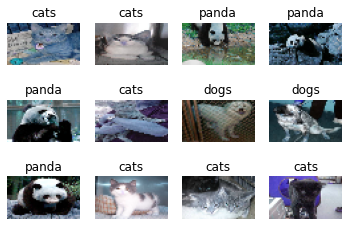

In [ ]:
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
trainY = np_utils.to_categorical(trainY, 3)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2400, 32, 55, 3)
(600, 32, 55, 3)
(2400, 3)
(600,)


In [ ]:
model = Sequential()

model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 54, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 27, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 26, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 13, 32)         0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 13, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2912)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [ ]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
75/75 [==============================] - 18s 43ms/step - loss: 0.9841 - accuracy: 0.4785
Epoch 2/25
75/75 [==============================] - 3s 43ms/step - loss: 0.7329 - accuracy: 0.6347
Epoch 3/25
75/75 [==============================] - 3s 44ms/step - loss: 0.6832 - accuracy: 0.6743
Epoch 4/25
75/75 [==============================] - 3s 44ms/step - loss: 0.5926 - accuracy: 0.7168
Epoch 5/25
75/75 [==============================] - 3s 44ms/step - loss: 0.5725 - accuracy: 0.7349
Epoch 6/25
75/75 [==============================] - 3s 44ms/step - loss: 0.5310 - accuracy: 0.7487
Epoch 7/25
75/75 [==============================] - 3s 45ms/step - loss: 0.5047 - accuracy: 0.7655
Epoch 8/25
75/75 [==============================] - 3s 45ms/step - loss: 0.4529 - accuracy: 0.8079
Epoch 9/25
75/75 [==============================] - 3s 45ms/step - loss: 0.4348 - accuracy: 0.7979
Epoch 10/25
75/75 [==============================] - 3s 44ms/step - loss: 0.4111 - accuracy: 0.8270
Epoch 11

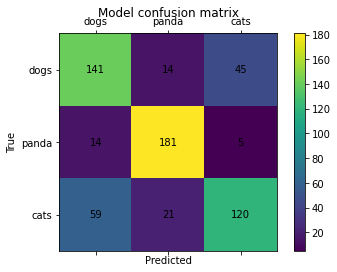

Accuracy : 73.67%


In [ ]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))